<a href="https://colab.research.google.com/github/PiHau/2024_MLEES/blob/main/FinalProject/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Final Project - Predicting Bike Sharing Demand Using LSTM

Certains résultats diffèrent légerement de la présentation, car je me suis rendu compte d'erreurs (notamment d'avoir conservé unne variable directement directement proportionnelle à "count" dans mon modèle)

# Chargement, tri et préparation des données




In [ ]:
import pandas as pd

# Chargement des fichiers CSV
day_data = pd.read_csv('day.csv')
hour_data = pd.read_csv('hour.csv')

# Aperçu des données
day_data.head()
hour_data.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

# Créer une nouvelle colonne 'datetime' en combinant 'dteday' et 'hr'
hour_data['datetime'] = hour_data['dteday'] + pd.to_timedelta(hour_data['hr'], unit='h')
hour_data.set_index('datetime', inplace=True)  # Optionnel si vous souhaitez définir 'datetime' comme index


# Visualisation et compréhension des données

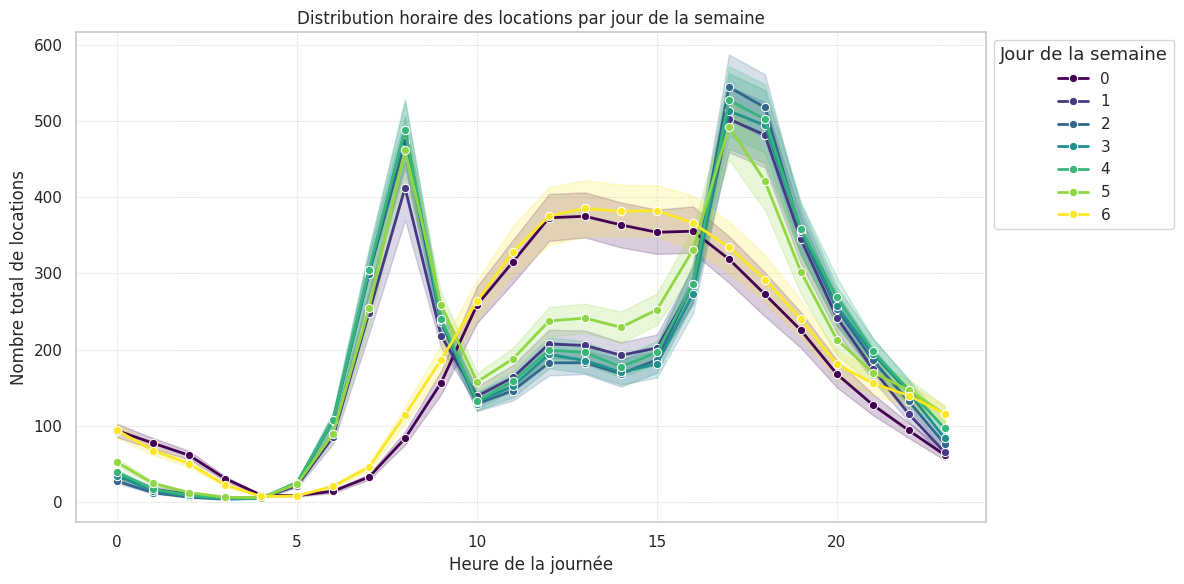

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choisir un style Seaborn plus moderne
sns.set(style="whitegrid", palette="muted")  # Style avec une grille blanche et palette de couleurs muted

# Création du graphique avec un style professionnel
fig, ax = plt.subplots(figsize=(12, 6))

# Utilisation de sns.lineplot pour un graphique plus fluide et esthétique
sns.lineplot(data=hour_data[['hr', 'cnt', 'weekday']], x='hr', y='cnt', hue='weekday', palette = 'viridis', marker="o", lw=2, ax=ax)

# Titre et labels avec un design plus élégant
ax.set(title="Distribution horaire des locations par jour de la semaine",
       xlabel="Heure de la journée",
       ylabel="Nombre total de locations")

# Personnalisation de la légende
plt.legend(title="Jour de la semaine", loc='upper left', bbox_to_anchor=(1, 1), title_fontsize='13', fontsize='11')

# Ajouter un fond de grille légère et une ligne de base
plt.grid(True, linestyle="--", linewidth=0.5, alpha=0.7)

# Afficher le graphique
plt.tight_layout()  # S'assure que les éléments du graphique ne se chevauchent pas
plt.show()


<ipython-input-4-8ebc4aab5b42>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=monthly_data, x='mnth', y='cnt', hue='yr', ci=None, palette='viridis', ax=ax)


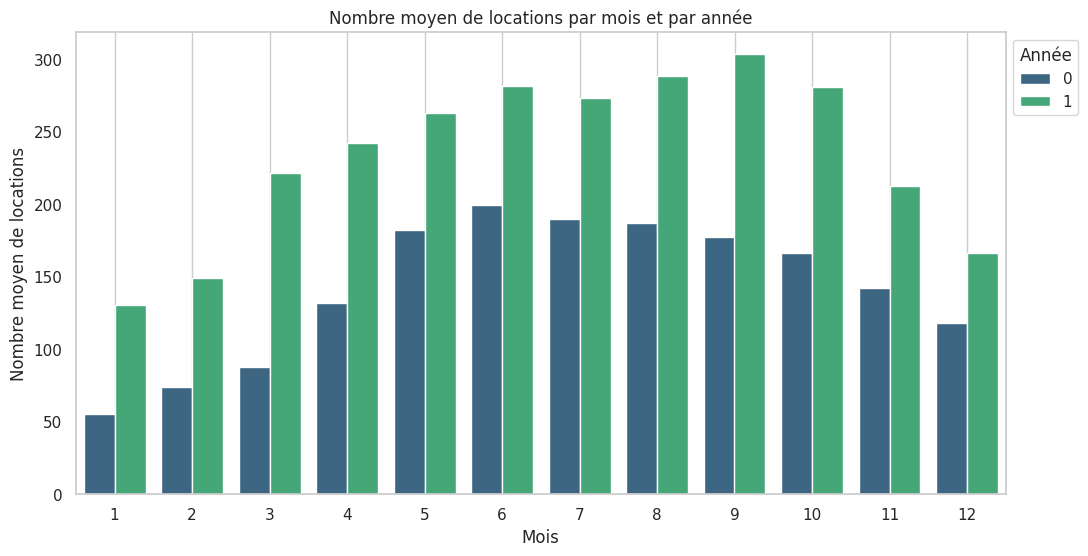

In [ ]:

# Regrouper les données par année et mois, et calculer les moyennes
monthly_data = hour_data.groupby(['yr', 'mnth'])['cnt'].mean().reset_index()

# Création du graphique
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=monthly_data, x='mnth', y='cnt', hue='yr', ci=None, palette='viridis', ax=ax)

# Ajuster les titres et labels
ax.set(title="Nombre moyen de locations par mois et par année",
       xlabel="Mois",
       ylabel="Nombre moyen de locations")
plt.legend(title="Année", loc='upper left', bbox_to_anchor=(1, 1))
plt.grid()
plt.show()


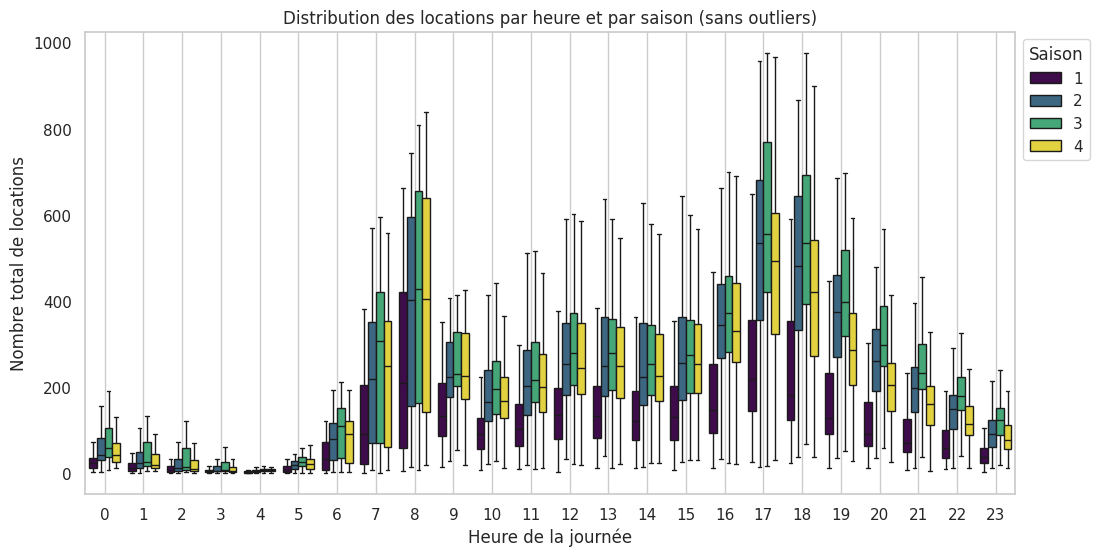

In [ ]:
# Création du graphique sans les outliers
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=hour_data, x='hr', y='cnt', hue='season', palette="viridis", showfliers=False, ax=ax)
ax.set(title="Distribution des locations par heure et par saison (sans outliers)",
       xlabel="Heure de la journée",
       ylabel="Nombre total de locations")
plt.legend(title="Saison", loc='upper left', bbox_to_anchor=(1, 1))
plt.grid()
plt.show()


<ipython-input-6-e62273da79bd>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=hour_data, x='weekday', y='cnt', ci=None, palette="viridis", ax=ax)
<ipython-input-6-e62273da79bd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=hour_data, x='weekday', y='cnt', ci=None, palette="viridis", ax=ax)


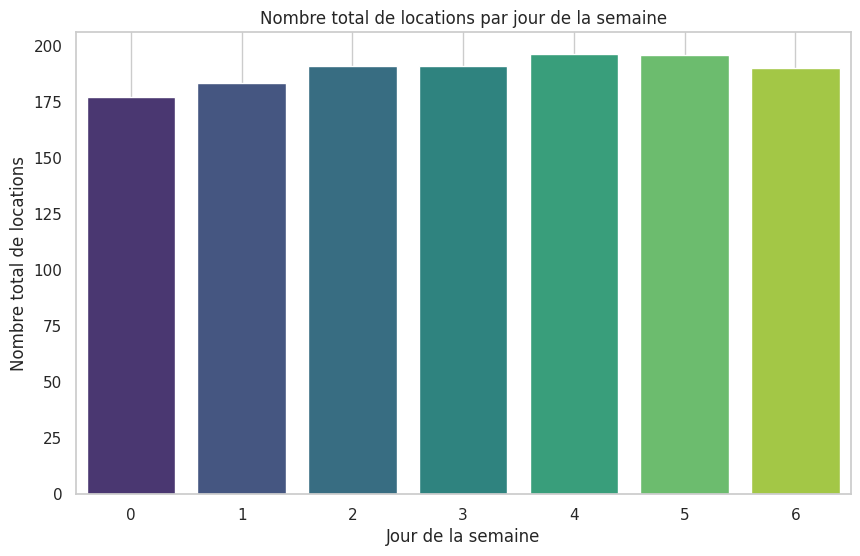

In [ ]:
# Création du graphique
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=hour_data, x='weekday', y='cnt', ci=None, palette="viridis", ax=ax)
ax.set(title="Nombre total de locations par jour de la semaine",
       xlabel="Jour de la semaine",
       ylabel="Nombre total de locations")
plt.grid()
plt.show()


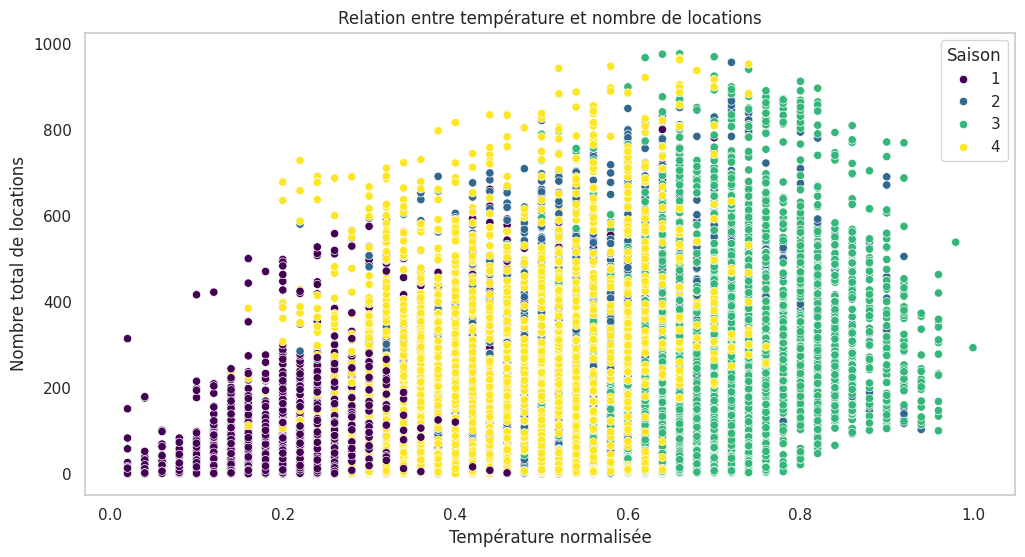

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.scatterplot(data=hour_data, x='temp', y='cnt', hue='season', palette="viridis", ax=ax)
ax.set(title="Relation entre température et nombre de locations",
       xlabel="Température normalisée",
       ylabel="Nombre total de locations")
plt.legend(title="Saison")
plt.grid()
plt.show()


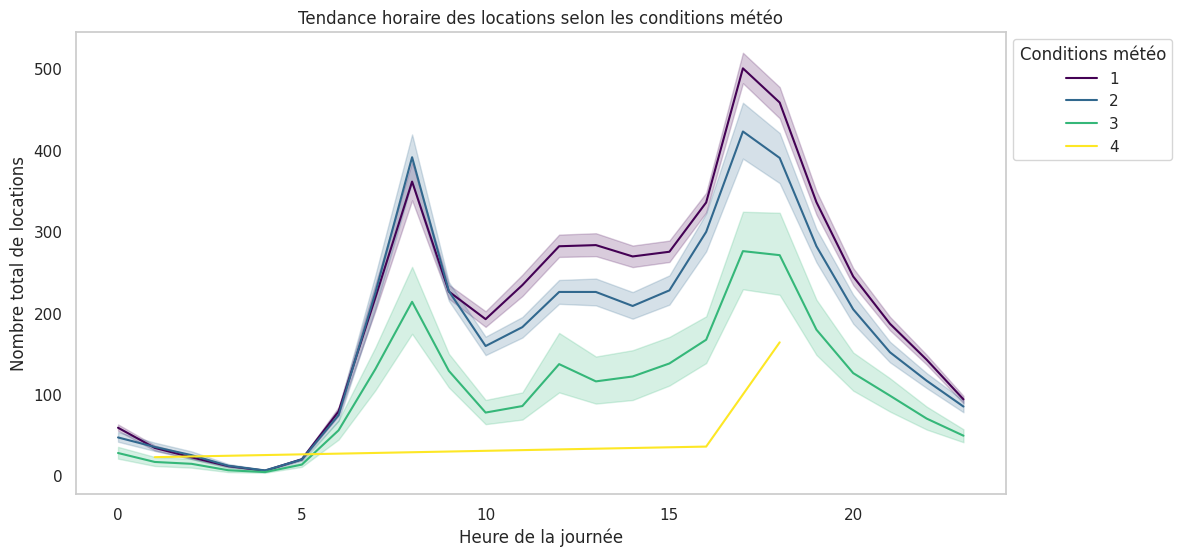

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=hour_data, x='hr', y='cnt', hue='weathersit', palette="viridis", ax=ax)
ax.set(title="Tendance horaire des locations selon les conditions météo",
       xlabel="Heure de la journée",
       ylabel="Nombre total de locations")
plt.legend(title="Conditions météo", loc='upper left', bbox_to_anchor=(1, 1))
plt.grid()
plt.show()


Corrélations entre variables

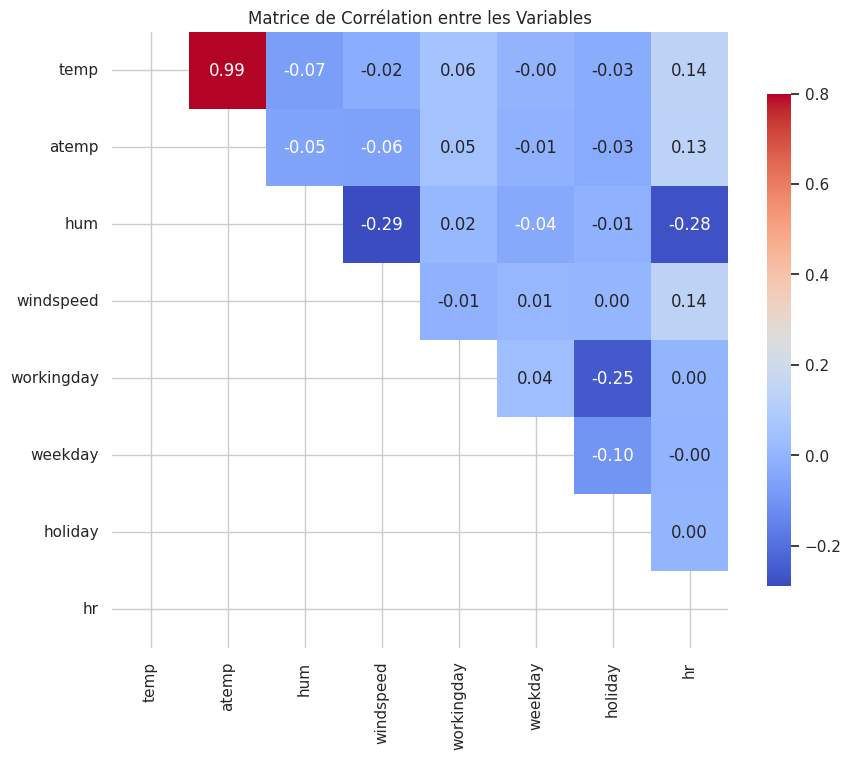

In [ ]:
import numpy as np
# Calculer la matrice de corrélation pour les colonnes pertinentes
corr_matrix = hour_data[["temp", "atemp", "hum", "windspeed","workingday","weekday", "holiday", 'hr']].corr()

# Création d'un masque pour afficher uniquement une moitié de la matrice
mask = np.zeros_like(corr_matrix, dtype=bool)
mask[np.tril_indices_from(mask)] = True

# Création de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", vmax=0.8, square=True, cbar_kws={"shrink": 0.8})
plt.title("Matrice de Corrélation entre les Variables")
plt.show()


# ACP

In [ ]:
from sklearn.preprocessing import StandardScaler

# Sélection des colonnes numériques pertinentes
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed','weekday', 'holiday', 'workingday', 'season', 'mnth', 'weathersit']

# Standardisation des données
scaler = StandardScaler()
day_scaled = scaler.fit_transform(day_data[numerical_columns])


In [ ]:
from sklearn.decomposition import PCA

# Application de l'ACP
pca = PCA()
day_pca = pca.fit_transform(day_scaled)

# Récupération des variances expliquées
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio


array([0.26746192, 0.16738419, 0.13409723, 0.12019784, 0.09759733,
       0.09079506, 0.07386965, 0.03191125, 0.01589876, 0.00078677])

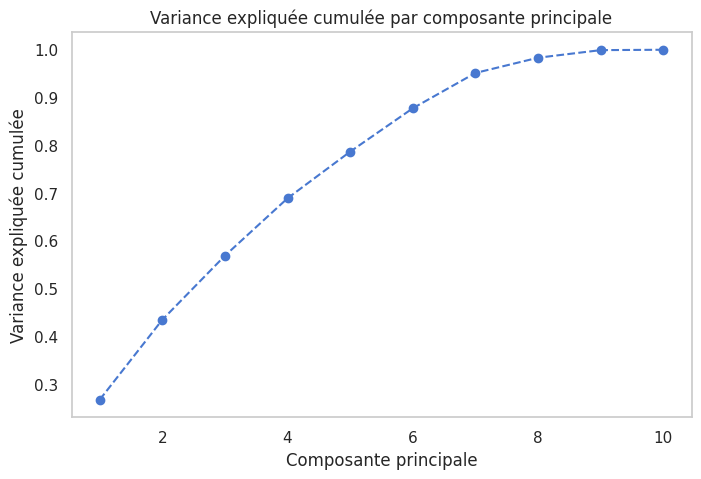

In [ ]:
import matplotlib.pyplot as plt

# Visualisation des variances expliquées cumulées
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.title('Variance expliquée cumulée par composante principale')
plt.xlabel('Composante principale')
plt.ylabel('Variance expliquée cumulée')
plt.grid()
plt.show()


le modèle de régression semble ne pas être approprié car un grand nombre de composantes est nécessaire pour expliquer la variance. Essayons

# Linear Regression

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


X = hour_data.drop(columns=['cnt', 'dteday', 'instant','casual','registered'])  # Exclure les colonnes non pertinentes
y = hour_data['cnt']

# Normalisation des données
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Application du PCA
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)

# Visualisation des variances expliquées (facultatif)
explained_variance_ratio = pca.explained_variance_ratio_


In [ ]:
# Fractionnement des données en ensemble d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)


In [ ]:
# Création et entraînement du modèle
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Prédictions
y_pred = model.predict(X_test)

# Calcul des métriques
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Affichage des résultats
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Coefficient of Determination (R^2): {r2:.2f} :(")


Mean Squared Error (MSE): 19438.68
Coefficient of Determination (R^2): 0.39 :(


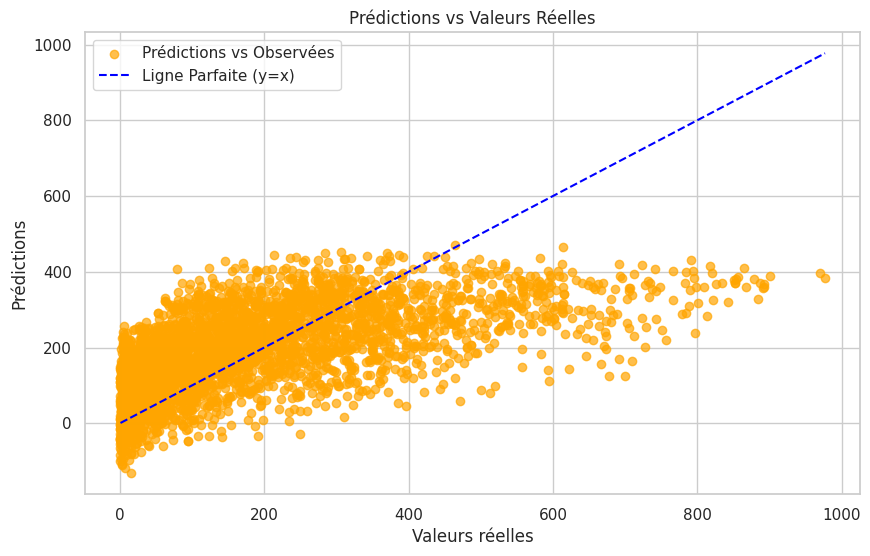

In [ ]:
# Visualisation des prédictions vs valeurs réelles
plt.figure(figsize=(10, 6))

# Scatter plot des valeurs réelles vs prédites
plt.scatter(y_test, y_pred, color='orange', alpha=0.7, label="Prédictions vs Observées")

# Ajouter une ligne parfaite (y=x)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='blue', linestyle='--', label="Ligne Parfaite (y=x)")

# Ajouter des labels et un titre
plt.title('Prédictions vs Valeurs Réelles')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')

# Afficher la légende et la grille
plt.legend()
plt.grid(True)
plt.show()


Pas approprié

# LSTM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [ ]:
hour_data = pd.read_csv('hour.csv')

hour_data['dteday'] = pd.to_datetime(hour_data['dteday'])

# Créer une nouvelle colonne 'datetime' en combinant 'dteday' et 'hr'
hour_data['datetime'] = hour_data['dteday'] + pd.to_timedelta(hour_data['hr'], unit='h')


# Vérifiez le résultat
print(hour_data.head())


   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  \
0           1  0.24  0.2879  0.81        0.0       3          13   16   
1           1  0.22  0.2727  0.80        0.0       8          32   40   
2           1  0.22  0.2727  0.80        0.0       5          27   32   
3           1  0.24  0.2879  0.75        0.0       3          10   13   
4           1  0.24  0.2879  0.75        0.0       0           1    1   

             datetime  
0 2011-01-01 00:00:00  
1 2011-01-01 01:00:00  
2 2011-01-01 02:00:00  
3 

Création de variables

In [ ]:
# Retards (lags)
hour_data['temp_lag_1'] = hour_data['temp'].shift(1)

# Indicateurs horaires
hour_data['is_morning'] = (hour_data['hr'] >= 6) & (hour_data['hr'] < 12)
hour_data['is_afternoon'] = (hour_data['hr'] >= 12) & (hour_data['hr'] < 18)
hour_data['is_evening'] = (hour_data['hr'] >= 18) & (hour_data['hr'] < 24)

# heures de pointe
hour_data['is_peak_hour'] = ((hour_data['hr'] >= 7) & (hour_data['hr'] < 9)) | \
                            ((hour_data['hr'] >= 17) & (hour_data['hr'] < 19))

# Température ressentie
hour_data['temp_diff'] = hour_data['temp'] - hour_data['atemp']

# Interaction saisonnière
hour_data['season_temp_interaction'] = hour_data['season'] * hour_data['temp']
hour_data['season_hum_interaction'] = hour_data['season'] * hour_data['hum']

# Interaction météo
hour_data['weather_temp_interaction'] = hour_data['weathersit'] * hour_data['temp']

# Calcul de la variance et skewness
hour_data['temp_variance'] = hour_data['temp'].rolling(window=7).var()

# Ajouter la colonne 'weekend' (weekend = 1 si c'est un samedi ou dimanche, sinon 0)
hour_data['weekend'] = hour_data['weekday'].isin([5, 6]).astype(int)  # 5 = samedi, 6 = dimanche

# Supprimer les valeurs manquantes après création des nouvelles colonnes
hour_data = hour_data.dropna()

# Afficher le dataframe mis à jour
print(hour_data)


       instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
6            7 2011-01-01       1   0     1   6        0        6           0   
7            8 2011-01-01       1   0     1   7        0        6           0   
8            9 2011-01-01       1   0     1   8        0        6           0   
9           10 2011-01-01       1   0     1   9        0        6           0   
10          11 2011-01-01       1   0     1  10        0        6           0   
...        ...        ...     ...  ..   ...  ..      ...      ...         ...   
17374    17375 2012-12-31       1   1    12  19        0        1           1   
17375    17376 2012-12-31       1   1    12  20        0        1           1   
17376    17377 2012-12-31       1   1    12  21        0        1           1   
17377    17378 2012-12-31       1   1    12  22        0        1           1   
17378    17379 2012-12-31       1   1    12  23        0        1           1   

       weathersit  ...  is_

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# One-Hot Encoding pour certaines variables catégoriques avec plusieurs niveaux
hour_data = pd.get_dummies(hour_data, columns=['weathersit', 'mnth'], drop_first=True)

# Liste des colonnes explicatives
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'holiday', 'workingday',
                     'temp_lag_1', 'is_morning', 'is_afternoon', 'is_evening', 'temp_diff',
                     'season_temp_interaction', 'season_hum_interaction', 'weather_temp_interaction',
                     'temp_variance', 'hr', 'weekend', 'is_peak_hour']

# Normalisation des colonnes numériques (sauf pour les variables binaires, qui ne changent pas)
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler_X.fit_transform(hour_data[numerical_columns])

# Vérification des dimensions
print("Dimensions des données normalisées :", X_scaled.shape)



Dimensions des données normalisées : (17373, 18)


In [ ]:
# Normalisation de la cible
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))


In [ ]:
# Diviser en train et test (80% train, 20% test)
train_size = int(len(y) * 0.8)
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y_scaled[:train_size], y_scaled[train_size:]


In [ ]:
# Fonction pour créer des séquences de données
def create_sequences(X, y, sequence_length=10):
    X_seq, y_seq = [], []
    for i in range(len(X) - sequence_length):
        X_seq.append(X[i:i+sequence_length])
        y_seq.append(y[i+sequence_length])
    return np.array(X_seq), np.array(y_seq)

# Créer des séquences pour l'entraînement et les tests
sequence_length = 10
X_train_seq, y_train_seq = create_sequences(X_train, y_train, sequence_length)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, sequence_length)

# Remodeler pour LSTM: [samples, time steps, features]
X_train_seq = X_train_seq.reshape(X_train_seq.shape[0], X_train_seq.shape[1], X_train_seq.shape[2])
X_test_seq = X_test_seq.reshape(X_test_seq.shape[0], X_test_seq.shape[1], X_test_seq.shape[2])


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.models import Sequential

# Création du modèle LSTM bidirectionnel
model = Sequential()

# Première couche LSTM bidirectionnelle avec Dropout
model.add(Bidirectional(LSTM(units=170, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]))))
model.add(Dropout(0.2))

# Deuxième couche LSTM bidirectionnelle avec Dropout
model.add(Bidirectional(LSTM(units=170, return_sequences=False)))
model.add(Dropout(0.2))

# Couche Dense pour la sortie
model.add(Dense(units=1))

# Compilation du modèle avec MSE comme fonction de perte
model.compile(optimizer="adam", loss="mse")

# EarlyStopping pour éviter l'overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entraînement du modèle
history = model.fit(X_train_seq, y_train_seq,
                    epochs=60,
                    batch_size=32,
                    validation_data=(X_test_seq, y_test_seq),
                    callbacks=[early_stop])

# Enregistrement du modèle après l'entraînement
model.save("bidirectional_lstm_model.h5")


Epoch 1/60


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


435/435 ━━━━━━━━━━━━━━━━━━━━ 57s 115ms/step - loss: 0.0212 - val_loss: 0.0158
Epoch 2/60
435/435 ━━━━━━━━━━━━━━━━━━━━ 47s 109ms/step - loss: 0.0074 - val_loss: 0.0194
Epoch 3/60
435/435 ━━━━━━━━━━━━━━━━━━━━ 82s 108ms/step - loss: 0.0058 - val_loss: 0.0152
Epoch 4/60
435/435 ━━━━━━━━━━━━━━━━━━━━ 48s 111ms/step - loss: 0.0052 - val_loss: 0.0136
Epoch 5/60
435/435 ━━━━━━━━━━━━━━━━━━━━ 83s 112ms/step - loss: 0.0048 - val_loss: 0.0140
Epoch 6/60
435/435 ━━━━━━━━━━━━━━━━━━━━ 47s 109ms/step - loss: 0.0048 - val_loss: 0.0152
Epoch 7/60
435/435 ━━━━━━━━━━━━━━━━━━━━ 82s 109ms/step - loss: 0.0047 - val_loss: 0.0169
Epoch 8/60
435/435 ━━━━━━━━━━━━━━━━━━━━ 83s 112ms/step - loss: 0.0045 - val_loss: 0.0150
Epoch 9/60
435/435 ━━━━━━━━━━━━━━━━━━━━ 82s 113ms/step - loss: 0.0047 - val_loss: 0.0126
Epoch 10/60
435/435 ━━━━━━━━━━━━━━━━━━━━ 47s 108ms/step - loss: 0.0044 - val_loss: 0.0152
Epoch 11/60
435/435 ━━━━━━━━━━━━━━━━━━━━ 82s 108ms/step - loss: 0.0043 - val_loss: 0.0127
Epoch 12/60
435/435 ━━━━━━━━━━

In [ ]:
# Faire des prédictions
y_pred = model.predict(X_test_seq)

# Inverser la normalisation des prédictions et des valeurs réelles
y_pred_inv = scaler_y.inverse_transform(y_pred)
y_test_inv = scaler_y.inverse_transform(y_test_seq)

# Calculer le R²
r2 = r2_score(y_test_inv, y_pred_inv)
print(f"R² du modèle LSTM : {r2:.4f}")


109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step
R² du modèle LSTM : 0.7923


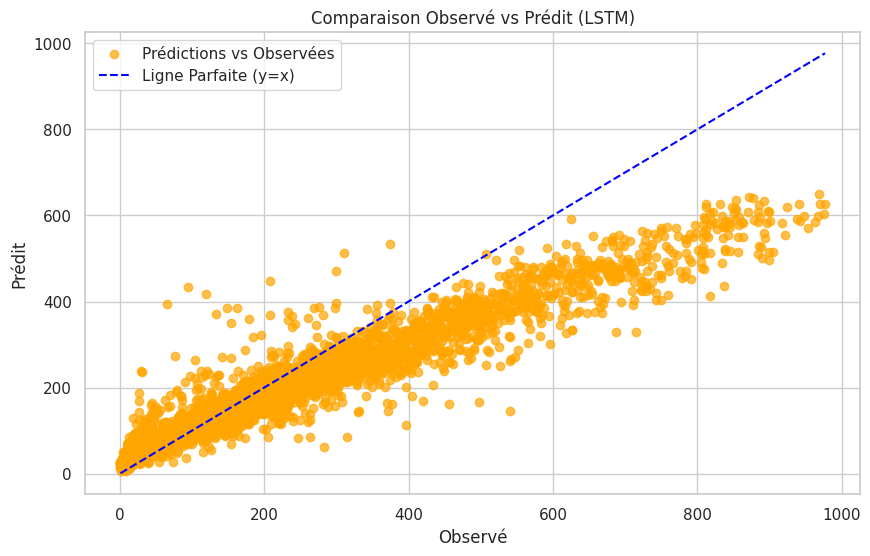

In [ ]:
# Visualisation des résultats avec scatter plot et ligne parfaite
plt.figure(figsize=(10, 6))

# Scatter plot des valeurs observées vs prédites
plt.scatter(y_test_inv, y_pred_inv, color='orange', alpha=0.7, label="Prédictions vs Observées")

# Ajouter une ligne parfaite (y=x)
plt.plot([min(y_test_inv), max(y_test_inv)], [min(y_test_inv), max(y_test_inv)], color='blue', linestyle='--', label="Ligne Parfaite (y=x)")

# Ajouter des labels et un titre
plt.title("Comparaison Observé vs Prédit (LSTM)")
plt.xlabel("Observé")
plt.ylabel("Prédit")

# Afficher la légende et la grille
plt.legend()
plt.grid(True)
plt.show()


109/109 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step


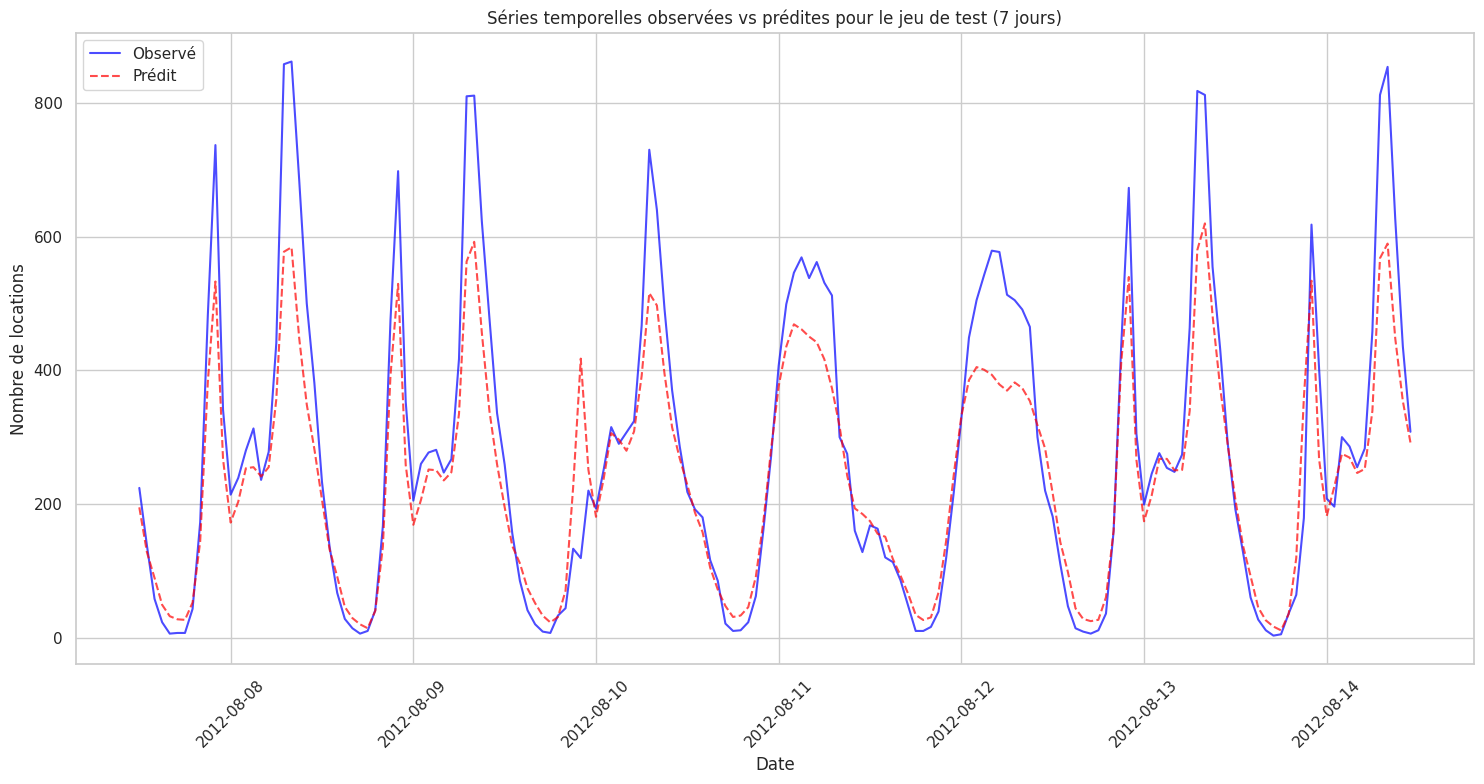

In [ ]:
import matplotlib.dates as mdates

# Définir test_size en fonction de la division initiale des données
test_size = len(y_scaled) - int(len(y_scaled) * 0.8)  # 20% des données pour le test

# Calculer les prédictions si ce n'est pas déjà fait
y_test_pred = scaler_y.inverse_transform(model.predict(X_test_seq))  # Générer les prédictions
y_test_inv = scaler_y.inverse_transform(y_test_seq)

# Création d'un index temporel à partir de `dteday` et `hr`
hour_data['datetime'] = pd.to_datetime(hour_data['dteday']) + pd.to_timedelta(hour_data['hr'], unit='h')
hour_data.set_index('datetime', inplace=True)

# Sélection des 7 jours de test
date_range = hour_data.index[-test_size:][:7 * 24]  # 7 jours
y_test_actual = y_test_inv[:7 * 24]
y_test_predicted = y_test_pred[:7 * 24]

# Plot des séries temporelles avec les jours sur l'axe horizontal
plt.figure(figsize=(15, 8))
plt.plot(date_range, y_test_actual, label="Observé", linestyle='-', color='blue', alpha=0.7)
plt.plot(date_range, y_test_predicted, label="Prédit", linestyle='-', color='red', alpha=0.7)

# Ajouter un titre et des labels
plt.title("Séries temporelles observées vs prédites pour le jeu de test (7 jours)")
plt.xlabel("Date")
plt.ylabel("Nombre de locations")

# Formatage de l'axe des dates
plt.gca().xaxis.set_major_locator(mdates.DayLocator())  # Marqueurs pour chaque jour
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Format des dates
plt.xticks(rotation=45)  # Rotation pour une meilleure lisibilité

# Ajouter une légende et afficher
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


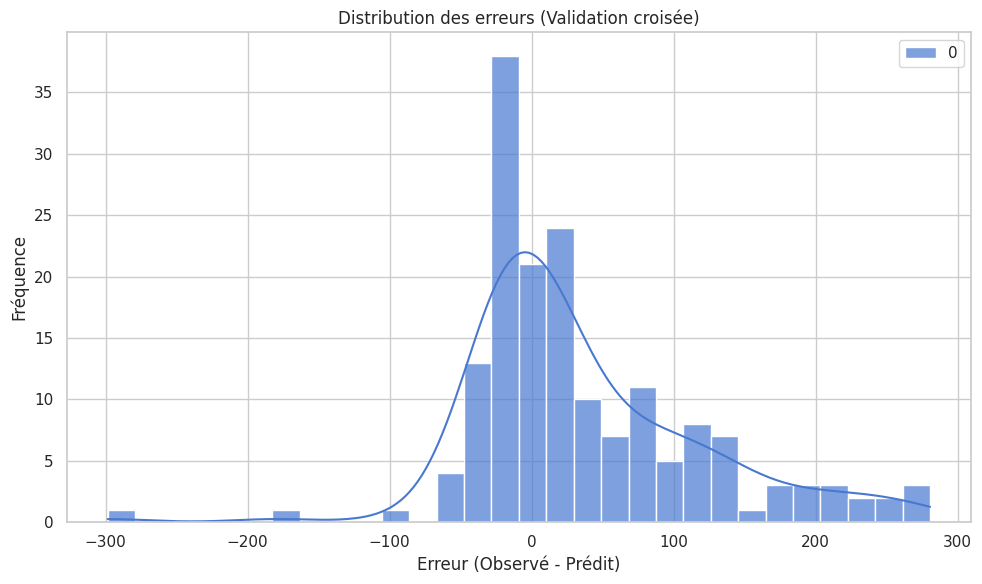

In [ ]:
# Calculer les erreurs pour le jeu de test
errors = y_test_actual - y_test_predicted

# Distribution des erreurs (Histogramme)
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True, color='blue', alpha=0.7)
plt.title("Distribution des erreurs (Validation croisée)")
plt.xlabel("Erreur (Observé - Prédit)")
plt.ylabel("Fréquence")
plt.grid(True)
plt.tight_layout()
plt.show()

# Cross-Validation

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


91/91 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


91/91 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step
MSE moyen sur 5 plis : 15545.59
R² moyen sur 5 plis : 0.53


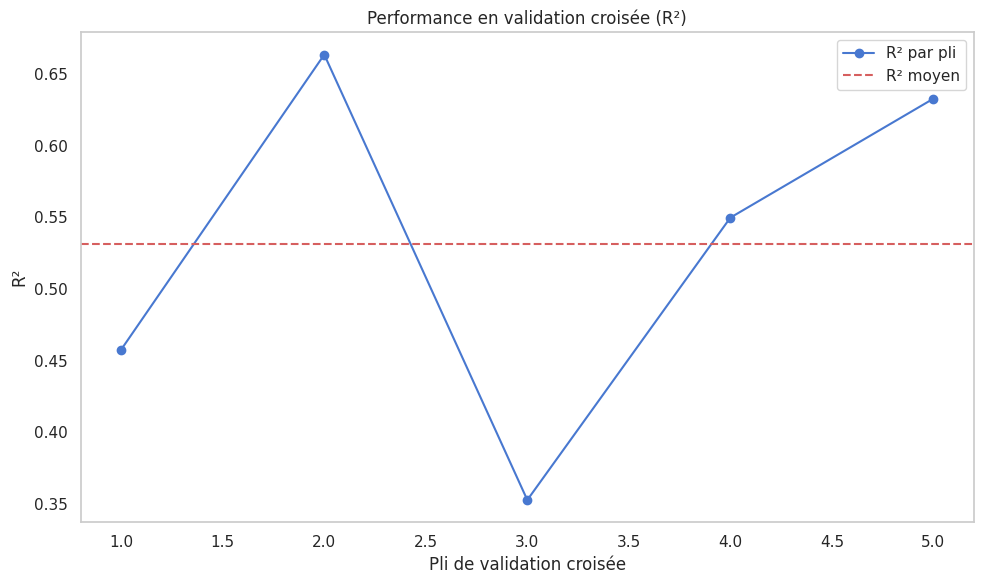

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

# Configuration de la validation croisée
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits)

# Stocker les scores pour chaque pli
r2_scores = []
mse_scores = []

# Préparation des données
X = X_scaled
y = y_scaled

# Validation croisée
for train_index, test_index in tscv.split(X):
    # Création des ensembles d'entraînement et de test pour ce pli
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Création des séquences pour LSTM
    X_train_seq_fold, y_train_seq_fold = create_sequences(X_train_fold, y_train_fold, sequence_length=10)
    X_test_seq_fold, y_test_seq_fold = create_sequences(X_test_fold, y_test_fold, sequence_length=10)

    # Initialisation du modèle LSTM
    model_fold = Sequential([
        Bidirectional(LSTM(170, return_sequences=True, input_shape=(X_train_seq_fold.shape[1], X_train_seq_fold.shape[2]))),
        Dropout(0.2),
        Bidirectional(LSTM(170, return_sequences=False)),
        Dropout(0.2),
        Dense(1)
    ])

    model_fold.compile(optimizer=Adam(), loss='mse')

    # Entraînement du modèle pour ce pli
    model_fold.fit(
        X_train_seq_fold, y_train_seq_fold,
        validation_data=(X_test_seq_fold, y_test_seq_fold),
        epochs=50,
        batch_size=32,
        callbacks=[early_stop],
        verbose=0  # Réduire les logs pour chaque pli
    )

    # Prédictions pour le jeu de test de ce pli
    y_test_pred_fold = scaler_y.inverse_transform(model_fold.predict(X_test_seq_fold))
    y_test_actual_fold = scaler_y.inverse_transform(y_test_seq_fold)

    # Calcul des métriques
    mse_fold = mean_squared_error(y_test_actual_fold, y_test_pred_fold)
    r2_fold = r2_score(y_test_actual_fold, y_test_pred_fold)

    # Stocker les résultats
    mse_scores.append(mse_fold)
    r2_scores.append(r2_fold)

# Résultats moyens
print(f"MSE moyen sur {n_splits} plis : {np.mean(mse_scores):.2f}")
print(f"R² moyen sur {n_splits} plis : {np.mean(r2_scores):.2f}")

# Visualisation des résultats
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_splits + 1), r2_scores, marker='o', label="R² par pli")
plt.axhline(y=np.mean(r2_scores), color='r', linestyle='--', label="R² moyen")
plt.title("Performance en validation croisée (R²)")
plt.xlabel("Pli de validation croisée")
plt.ylabel("R²")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


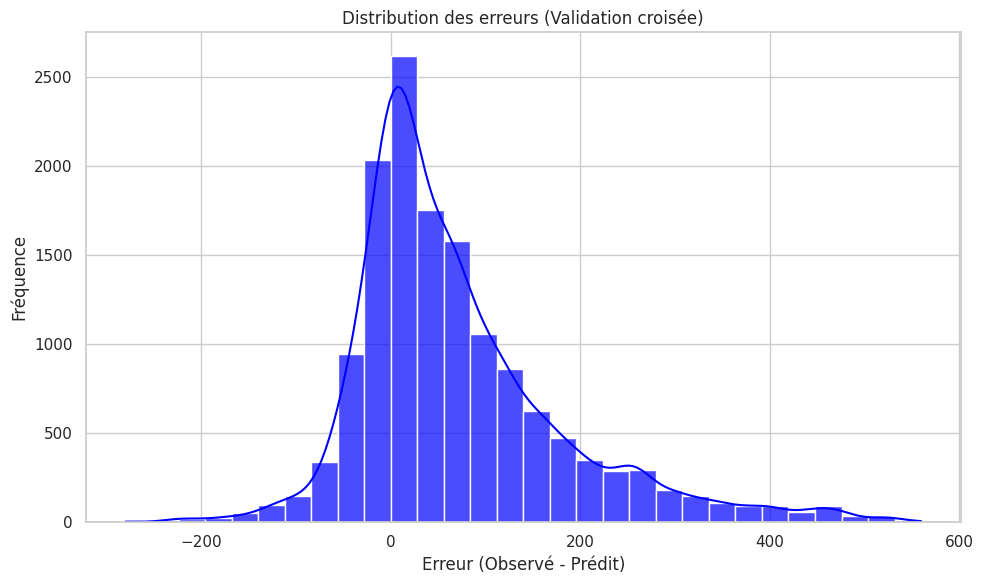

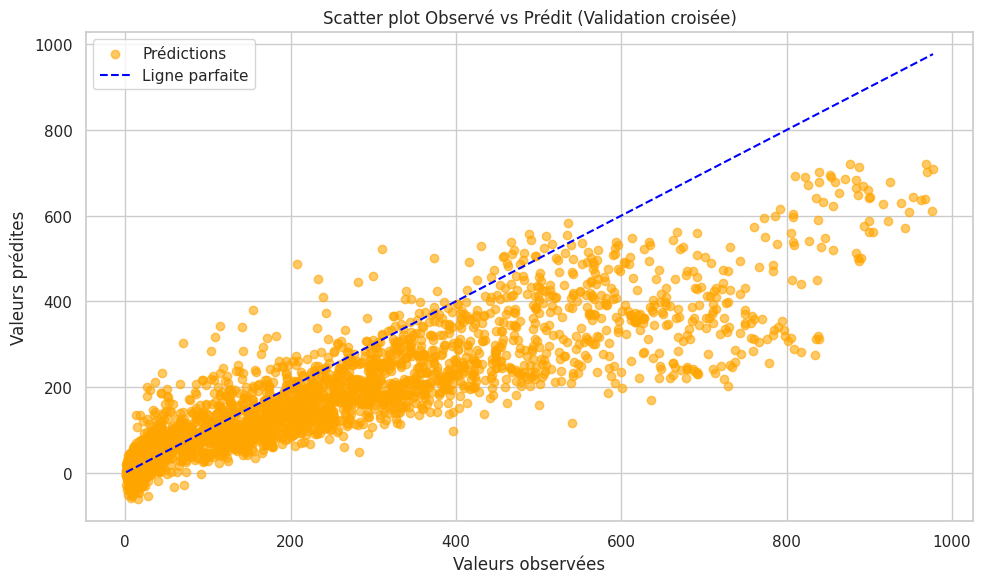

In [ ]:
import seaborn as sns

# Rassembler toutes les erreurs pour tous les plis
errors = []
for i in range(len(r2_scores)):
    fold_errors = y_test_actual_fold - y_test_pred_fold
    errors.extend(fold_errors.flatten())

# Distribution des erreurs (Histogramme)
plt.figure(figsize=(10, 6))
sns.histplot(errors, bins=30, kde=True, color='blue', alpha=0.7)
plt.title("Distribution des erreurs (Validation croisée)")
plt.xlabel("Erreur (Observé - Prédit)")
plt.ylabel("Fréquence")
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter plot Observé vs Prédit pour la validation croisée
plt.figure(figsize=(10, 6))
plt.scatter(y_test_actual_fold, y_test_pred_fold, alpha=0.6, color='orange', label="Prédictions")
plt.plot(
    [min(y_test_actual_fold), max(y_test_actual_fold)],
    [min(y_test_actual_fold), max(y_test_actual_fold)],
    color='blue', linestyle='--', label="Ligne parfaite"
)
plt.title("Scatter plot Observé vs Prédit (Validation croisée)")
plt.xlabel("Valeurs observées")
plt.ylabel("Valeurs prédites")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
